# Renormalization of the 2-dimensional pseudofractal simplicial complex

In [1]:
import sys

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.

import numpy as np
from Scripts import renormalize, scomplex, plotting
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
plt.rcParams["text.usetex"] = True


colors = ["#003F5C","#2F4B7C","#665191","#A05195","#D45087","#F95D6A","#FF7C43","#FFA600"]
colors_sequential = colors + colors + colors + colors 
colors = ["#02405c", "#fea600", "#a20655", "#5e96c5", "#4b3596", "#fa6ca9", "#8d6cf6"]
colors_curves = colors+ colors+ colors+ colors


Generate the pseudofractal simplcial complex

In [2]:
steps = 5
sc = scomplex.pseudofractal_d2(steps)

## Display entropic susceptibilities (Fig. 2b)

In [3]:
# Define the string specifying the cross-order Laplacians to consider

laplacians_types = ["01","02","10","12","20","21"]

sparse = False
num_eigs = 500

# Compute eigenvalues of the Laplacians and their entropic susceptibilities 

taumin = -11 # C curve starts from 10**taumin
taumax = 4 # C curve ends at 10**taumax
ntau = 200 # Number of times to consider in the interval

C_curves = []
sp_dims = []

for l in laplacians_types:  
    print(f"L_({l[0]},{l[1]})")  
    L = scomplex.XO_laplacian(sc, k=int(l[0]), l=int(l[1]), sparse = sparse)
  
    if sparse:
        D,U = scipy.sparse.linalg.eigsh(L.asfptype(),k = num_eigs, which = "SM")
        D = np.append(D,1000000*np.ones(L.shape[0]-num_eigs),axis=0)
    else:
        D,U = np.linalg.eigh(L)
        D = np.abs(D)

    entropic_susceptibility,tau_space, __ = renormalize.compute_entropic_C(D,taumin,taumax,ntau)
    spectral_dimension,tau_space = renormalize.compute_spectral_d(D,taumin,taumax,ntau)
    C_curves.append(entropic_susceptibility)
    sp_dims.append(spectral_dimension)


L_(0,1)


/Users/marconurisso/Desktop/Lavoro/Projects/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/Notebooks/../Scripts/renormalize.py:33: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


L_(0,2)
L_(1,0)
L_(1,2)
L_(2,0)
L_(2,1)


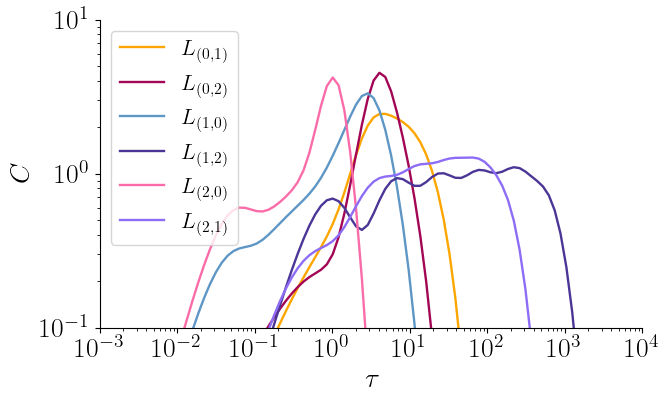

In [4]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,1,figsize = (7,4))
for id,i in enumerate(laplacians_types):
    ax.loglog(tau_space,C_curves[id],color = colors_curves[id+1],linewidth = 1.7,alpha = 1)


ax.set_ylim([10**-1,10])
ax.set_xlim([10**-3,10**4])

ax.legend(names,fontsize = 16)

ax.set_xlabel(r"$\tau$",fontsize = 20)
ax.set_ylabel(r"$C$",fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

sns.despine()


## Fig. 2c

In [27]:
steps = [2,3,4,5,6,7]
taumin = -3
taumax = 4
ntau = 100

laplacians_types = ["01","02","10","12","20","21"]

C = []
for i,s in enumerate(steps):
    C.append([])
    print(s)
    sc = scomplex.pseudofractal_d2(s)
    for j,l in enumerate(laplacians_types):  
        L = scomplex.XO_laplacian(sc, k=int(l[0]), l=int(l[1]))
        D,U = np.linalg.eigh(L)
        D = np.abs(D)
        entropic_susceptibility,tau_space, __ = renormalize.compute_entropic_C(D,taumin,taumax,ntau)
        C[-1].append(entropic_susceptibility)
      

2
3


/Users/marconurisso/Desktop/Lavoro/Projects/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/Notebooks/../Scripts/renormalize.py:33: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


4
5
6
7


In [34]:
SIPS = np.zeros((len(steps),len(laplacians_types)))

for i,s in enumerate(steps):
    for j,l in enumerate(laplacians_types):  
        SIPS[i,j] = renormalize.measure_SI(tau_space, C[i][j], epsilon = 0.15, ymin = -3,ymax = 1, ny = 100)


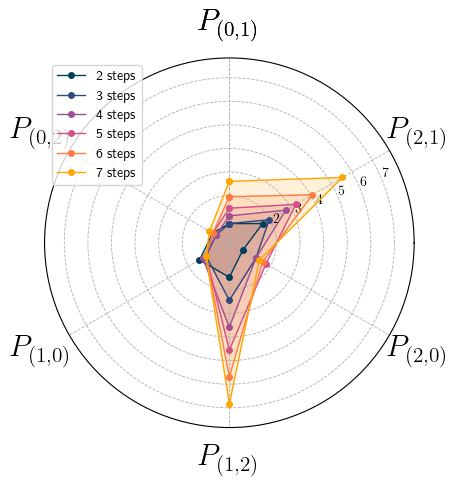

In [43]:
ax = plt.subplot(1,1,1, polar=True)

angles = np.mod(np.pi/2 + np.linspace(0, 2*np.pi, len(laplacians_types), endpoint=False),2*np.pi)
stats = np.concatenate([SIPS,SIPS[:,[0]]], axis = 1)
angles = np.concatenate((angles,[angles[0]]))
for i in range(len(steps)):
    ax.plot(angles, stats[i,:], 'o-', linewidth=1,color = colors_sequential[int(1.5*i)], markersize = 4, label = f"{steps[i]} steps")
    ax.fill(angles, stats[i,:], alpha=0.15,color = colors_sequential[int(1.5*i)])

ax.set_xticks(angles,[f"$P_{{({l[0]},{l[1]})}}$" for l in laplacians_types+[laplacians_types[0]]],fontsize = 22);
ax.set_rticks([ll for ll in range(2,int(max(np.max(stats)+2,5)))], fontsize =18)
ax.tick_params(axis='x', which='major', pad=13)
ax.set_ylim(0,max(np.max(stats)+1,4.2))
ax.grid(True)
ax.grid(linewidth=0.6,linestyle = '--')
ax.legend()


## Renormalize the simplicial complex (Fig. 2d)

Create a smaller simplicial complex for visualization

In [13]:
steps = 4
sc = scomplex.pseudofractal_d2(steps)

### Renormalization with the standard graph Laplacian

123
76
61
46


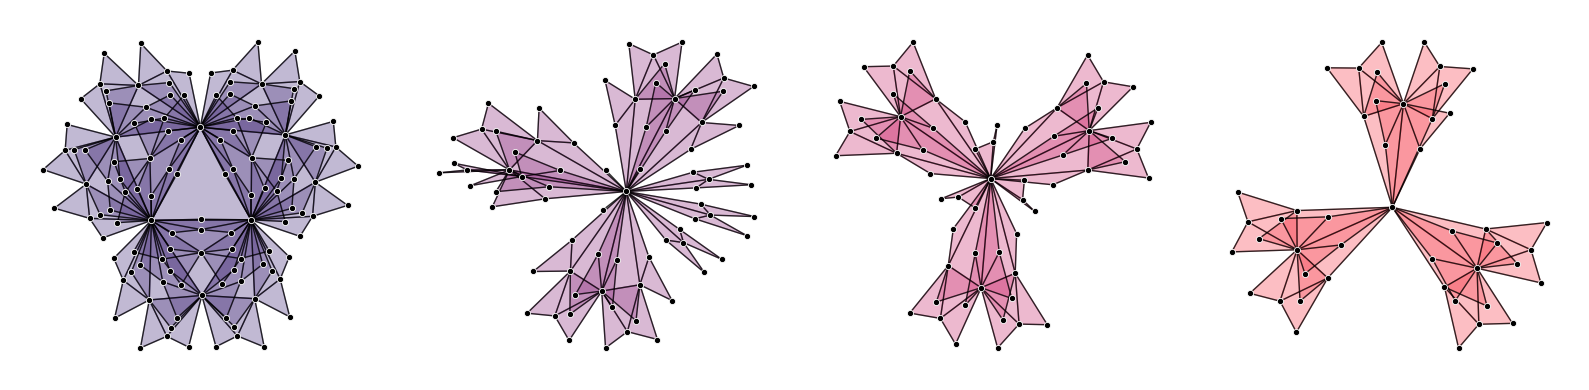

In [14]:
lmax = 4 # Number of steps
diff_order = 0 # Diffusion order
int_order = 1 # Interaction order
tau = 0.2 # Diffusion time
VERBOSE = True # Whether to print the number of nodes after each step

sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, VERBOSE = VERBOSE)

# Plot sequence
f,axs = plt.subplots(1,lmax,figsize = (4*lmax,4))
i = 0
for new_sc in sequence:
    col = colors_sequential[i+2]
    plotting.plot_complex(new_sc,ax = axs[i],face_color=[col],face_alpha=0.4,node_size=20,iterations=2000)
    axs[i].collections[1].set_alpha(0.8)
    axs[i].collections[0].set_linewidth(0.6) 
    axs[i].collections[0].set_edgecolor("#FFFFFF") 
    i+=1
plt.tight_layout()


### Renormalization with the (1,2) cross-order Laplacian

123
42
15
6


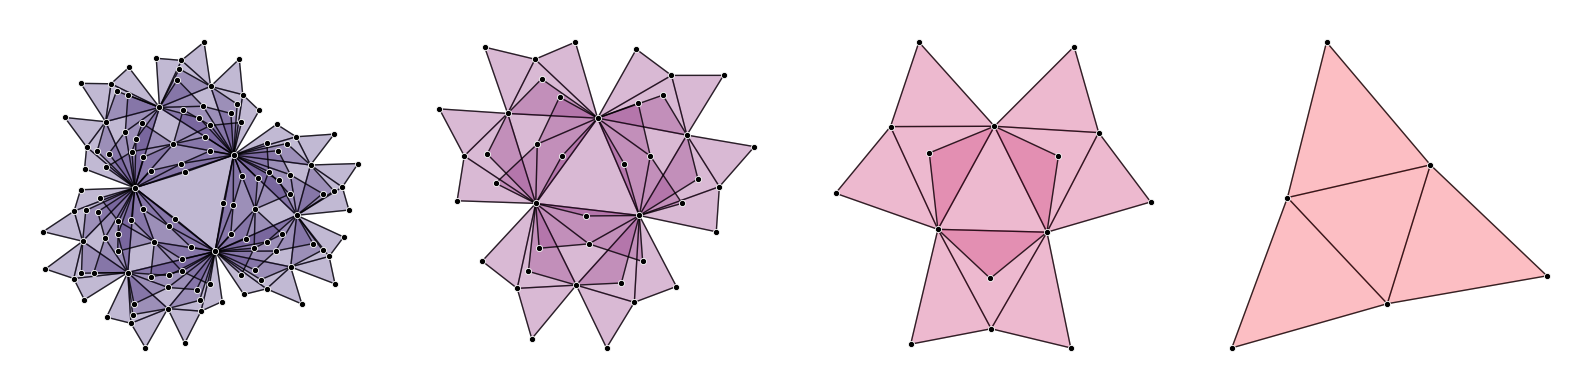

In [15]:
lmax = 4 # Number of steps
diff_order = 1 # Diffusion order
int_order = 2 # Interaction order
tau = 2.6 # Diffusion time
VERBOSE = True # Whether to print the number of nodes after each step

sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, VERBOSE = VERBOSE)

# Plot sequence
f,axs = plt.subplots(1,lmax,figsize = (4*lmax,4))
i = 0
for new_sc in sequence:
    col = colors_sequential[i+2]
    plotting.plot_complex(new_sc,ax = axs[i],face_color=[col],face_alpha=0.4,node_size=20,iterations=2000)
    axs[i].collections[1].set_alpha(0.8)
    axs[i].collections[0].set_linewidth(0.6) 
    axs[i].collections[0].set_edgecolor("#FFFFFF") 
    i+=1
plt.tight_layout()
